# ML for Reservation Data & Correlation with Houston Census Figures

import pandas as pd
import numpy as np
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xlrd
import seaborn as sns

In [2]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Reading in Census Data

In [3]:
Census_Data = pd.read_csv('censuses.csv', index_col=None)
Census_Data.head(5)

,line_number,house_number,street_name,last_name,given_name,relation,color_race,sex,age_at_last_birthday,occupation,own_or_rent,owned_free_or_mortgage,house_or_farm,my_notes,file_name,census_year,grouped_occu
0,65,830,Arthur St,Brown,Eliza,Boarder,B,F,26,Servant,Null,Null,Null,Null,1900 census ED 70 page 2,1900,Unskilled
1,63,830,Arthur St,Butcher,John H.,Boarder,B,M,27,Drayman,Null,Null,Null,Null,1900 census ED 70 page 2,1900,Unskilled
2,61,830,Arthur St,Olliver,Marsha,Head,B,F,25,Laundress,Rent,Null,House,Null,1900 census ED 70 page 2,1900,Unskilled
3,64,830,Arthur St,Spivey,Neata,Boarder,B,F,25,Servant,Null,Null,Null,Null,1900 census ED 70 page 2,1900,Unskilled
4,62,830,Arthur St,Wells,Ethel,Daughter,B,F,8,At School,Null,Null,Null,Null,1900 census ED 70 page 2,1900,Student


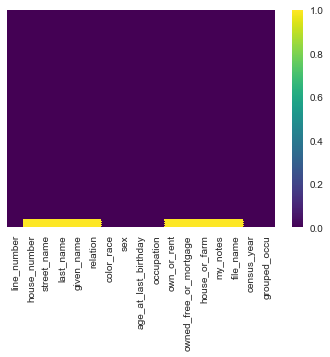

In [4]:
sns.heatmap(Census_Data.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [5]:
Census_Data.isnull().any()

line_number               False
house_number               True
street_name                True
last_name                  True
given_name                 True
relation                   True
color_race                False
sex                       False
age_at_last_birthday      False
occupation                False
own_or_rent                True
owned_free_or_mortgage     True
house_or_farm              True
my_notes                   True
file_name                  True
census_year               False
grouped_occu              False
dtype: bool

In [6]:
Census_Data.columns

Index(['line_number', 'house_number', 'street_name', 'last_name', 'given_name',
       'relation', 'color_race', 'sex', 'age_at_last_birthday', 'occupation',
       'own_or_rent', 'owned_free_or_mortgage', 'house_or_farm', 'my_notes',
       'file_name', 'census_year', 'grouped_occu'],
      dtype='object')

In [7]:
Census_Data = Census_Data[['color_race', 'sex', 'age_at_last_birthday', 'occupation',
       'census_year', 'grouped_occu']]

In [8]:
Census_Data.isnull().any()

color_race              False
sex                     False
age_at_last_birthday    False
occupation              False
census_year             False
grouped_occu            False
dtype: bool

In [9]:
Census_Data['age_at_last_birthday'].unique()

array(['26', '27', '25', '8', '46', '34', '19', '15', '12', '9', '21',
       '5', '0', '2', '58', '35', '23', '18', '13', '56', '41', '20',
       '39', '7', '24', '51', '43', '17', '14', '60', '22', '54', '48',
       '10', '28', '30', '11', '32', '31', '29', '50', '49', '1', '63',
       '33', '6', '64', '3', '37', '55', '36', '57', '53', '16', '87',
       '81', '38', '4', '65', '45', '40', '76', '47', '44', '75', '42',
       '52', '61', '68', '69', '77', '105', '59', '62', 'Null', '84',
       '80', '5 and 0 months', '2 months', '2 and 3 month',
       '5 and 1 month', '3 and 10 months', '11 months', '70', 'un - (80)',
       '3 and 11 months', '9 months', '2 and 11 months', '5 months',
       '5 and 11 months', '67', '4 and 0 months', 'Un.', '6 and 1 month',
       '4 and 1 month', '2 and 6 months', '4 and 10 months',
       '1 and 4 months', '1 month', '2 and 5 months', '8 months', '73',
       '10 months', '2 and 10 months', '1 and 9 months', '4 months',
       '2 and 3 months

In [10]:
def age_clean(data,under_1_value = 1, pandas = 'yes'):
    clean_age = []
    if pandas == 'yes':
        data_lst = data.tolist()
    else:
        data_lst = data
    for datum in data_lst:
        if 'month' in str(datum):
            if 'and' in str(datum):
                clean_age.append(str(datum).split(' ')[0])
            else:
                clean_age.append(str(under_1_value))
        else:
            clean_age.append(datum)
    return clean_age

In [11]:
dirty_age = Census_Data['age_at_last_birthday']
#dirty_age
clean_age = age_clean(dirty_age,under_1_value = 1, pandas = 'yes')

In [12]:
Census_Data['Age'] = clean_age

In [13]:
Census_Data=Census_Data.dropna()
Census_Data['Age'].unique()

array(['26', '27', '25', '8', '46', '34', '19', '15', '12', '9', '21',
       '5', '0', '2', '58', '35', '23', '18', '13', '56', '41', '20',
       '39', '7', '24', '51', '43', '17', '14', '60', '22', '54', '48',
       '10', '28', '30', '11', '32', '31', '29', '50', '49', '1', '63',
       '33', '6', '64', '3', '37', '55', '36', '57', '53', '16', '87',
       '81', '38', '4', '65', '45', '40', '76', '47', '44', '75', '42',
       '52', '61', '68', '69', '77', '105', '59', '62', 'Null', '84',
       '80', '70', 'un - (80)', '67', 'Un.', '73', '71', '66', '90', '85',
       '72', '92', '82', '83', '100', '78', '74', '79'], dtype=object)

In [14]:
Census_Data.shape

(4244, 7)

In [15]:
print(Census_Data[Census_Data.isnull().any(axis=1)].head())

Empty DataFrame
Columns: [color_race, sex, age_at_last_birthday, occupation, census_year, grouped_occu, Age]
Index: []


In [16]:
Census_Data['Age'] = pd.to_numeric(Census_Data['Age'], errors='coerce')

In [17]:
Census_Data['Age'].unique()

array([ 26.,  27.,  25.,   8.,  46.,  34.,  19.,  15.,  12.,   9.,  21.,
         5.,   0.,   2.,  58.,  35.,  23.,  18.,  13.,  56.,  41.,  20.,
        39.,   7.,  24.,  51.,  43.,  17.,  14.,  60.,  22.,  54.,  48.,
        10.,  28.,  30.,  11.,  32.,  31.,  29.,  50.,  49.,   1.,  63.,
        33.,   6.,  64.,   3.,  37.,  55.,  36.,  57.,  53.,  16.,  87.,
        81.,  38.,   4.,  65.,  45.,  40.,  76.,  47.,  44.,  75.,  42.,
        52.,  61.,  68.,  69.,  77., 105.,  59.,  62.,  nan,  84.,  80.,
        70.,  67.,  73.,  71.,  66.,  90.,  85.,  72.,  92.,  82.,  83.,
       100.,  78.,  74.,  79.])

In [18]:
Census_Data.isnull().any()

color_race              False
sex                     False
age_at_last_birthday    False
occupation              False
census_year             False
grouped_occu            False
Age                      True
dtype: bool

In [19]:
Census_Data=Census_Data.dropna()

In [20]:
Census_Data.isnull().any()

color_race              False
sex                     False
age_at_last_birthday    False
occupation              False
census_year             False
grouped_occu            False
Age                     False
dtype: bool

In [21]:
Census_Data.shape

(4240, 7)

In [22]:
Census_Data['color_race'].unique()

array(['B', 'W', 'Mu', 'M', 'M/W', 'My', 'Jp'], dtype=object)

In [23]:
Census_Data['color_race'].replace(['Mu', 'M', 'M/W', 'My'], "B", inplace=True)

In [24]:
Census_Data['color_race'].unique()

array(['B', 'W', 'Jp'], dtype=object)

In [25]:
Census_Data = Census_Data[Census_Data.color_race != 'Jp']
Census_Data['color_race'].unique()

array(['B', 'W'], dtype=object)

In [26]:
Census_Data['sex'].unique()

array(['F', 'M', 'FM'], dtype=object)

In [27]:
Census_Data = Census_Data[Census_Data.sex != 'FM']
Census_Data['sex'].unique()

array(['F', 'M'], dtype=object)

In [28]:
Census_Data['census_year'].unique()

array([1900, 1920, 1910], dtype=int64)

In [29]:
Census_Data['grouped_occu'].unique()

array(['Unskilled', 'Student', 'Missing Occupations', 'Skilled Labor',
       'Skilled Professionals'], dtype=object)

In [30]:
Census_Data.shape

(4236, 7)

In [31]:
Census_Data.rename(columns={'color_race': 'Race', 'sex': 'Sex', 'census_year':'Year',
                           'grouped_occu':'Occ'}, inplace=True)

In [32]:
Census_Data.head(10)

,Race,Sex,age_at_last_birthday,occupation,Year,Occ,Age
0,B,F,26,Servant,1900,Unskilled,26.0
1,B,M,27,Drayman,1900,Unskilled,27.0
2,B,F,25,Laundress,1900,Unskilled,25.0
3,B,F,25,Servant,1900,Unskilled,25.0
4,B,F,8,At School,1900,Student,8.0
5,B,M,46,Day Laborer,1900,Unskilled,46.0
6,B,F,34,Null,1900,Missing Occupations,34.0
7,B,M,19,Drayman,1900,Unskilled,19.0
8,B,F,15,Null,1900,Missing Occupations,15.0
9,B,M,12,At School,1900,Student,12.0


In [33]:
del Census_Data['age_at_last_birthday']
Census_Data.head(5)

,Race,Sex,occupation,Year,Occ,Age
0,B,F,Servant,1900,Unskilled,26.0
1,B,M,Drayman,1900,Unskilled,27.0
2,B,F,Laundress,1900,Unskilled,25.0
3,B,F,Servant,1900,Unskilled,25.0
4,B,F,At School,1900,Student,8.0


In [34]:
Census_Data = Census_Data[Census_Data.Occ != 'Missing Occupations']

In [35]:
Census_Data.shape

(2837, 6)

In [36]:
Census_Data.head(5)

,Race,Sex,occupation,Year,Occ,Age
0,B,F,Servant,1900,Unskilled,26.0
1,B,M,Drayman,1900,Unskilled,27.0
2,B,F,Laundress,1900,Unskilled,25.0
3,B,F,Servant,1900,Unskilled,25.0
4,B,F,At School,1900,Student,8.0


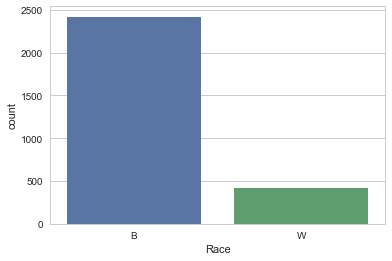

In [37]:
sns.countplot(x = 'Race',data=Census_Data)
plt.show()

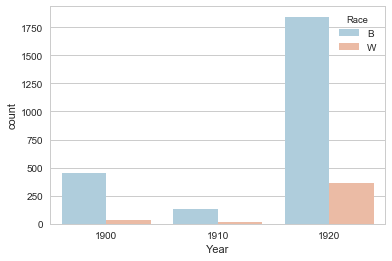

In [38]:
sns.countplot(x='Year',hue='Race',data=Census_Data,palette='RdBu_r')

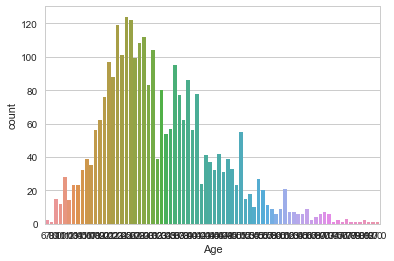

In [39]:
sns.countplot(x = 'Age',data=Census_Data)
plt.show()



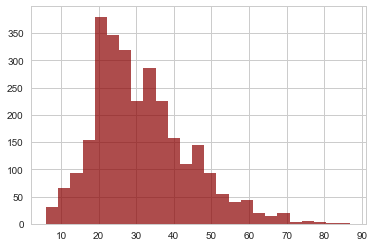

In [40]:
Census_Data['Age'].hist(bins=25,color='darkred',alpha=0.7)

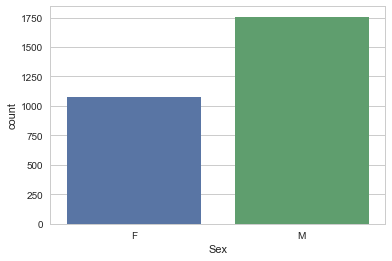

In [41]:
sns.countplot(x = 'Sex',data=Census_Data)
plt.show()

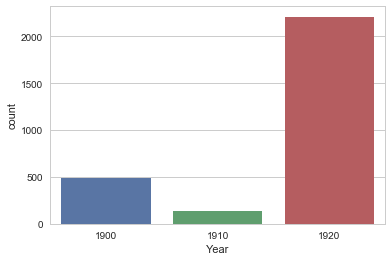

In [42]:
sns.countplot(x = 'Year',data=Census_Data)
plt.show()

In [43]:
age_ranges= [0,11,19,40,65,110]
age_labels = ['age_0-11','age_12-19','age_20-40','age_40-65','age_Above-65']
Census_Data['Age'] = pd.cut(Census_Data['Age'], bins=age_ranges, labels=age_labels)

In [44]:
Census_Data.head(5)

,Race,Sex,occupation,Year,Occ,Age
0,B,F,Servant,1900,Unskilled,age_20-40
1,B,M,Drayman,1900,Unskilled,age_20-40
2,B,F,Laundress,1900,Unskilled,age_20-40
3,B,F,Servant,1900,Unskilled,age_20-40
4,B,F,At School,1900,Student,age_0-11


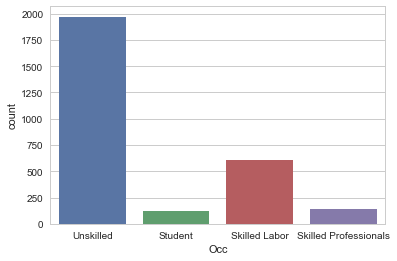

In [45]:
sns.countplot(x = 'Occ',data=Census_Data)
plt.show()

In [46]:
data2 = pd.get_dummies(Census_Data, columns =['Race','Sex', 'Year','Age'])
data2.columns

Index(['occupation', 'Occ', 'Race_B', 'Race_W', 'Sex_F', 'Sex_M', 'Year_1900',
       'Year_1910', 'Year_1920', 'Age_age_0-11', 'Age_age_12-19',
       'Age_age_20-40', 'Age_age_40-65', 'Age_age_Above-65'],
      dtype='object')

In [47]:
data2.head()

,occupation,Occ,Race_B,Race_W,Sex_F,Sex_M,Year_1900,Year_1910,Year_1920,Age_age_0-11,Age_age_12-19,Age_age_20-40,Age_age_40-65,Age_age_Above-65
0,Servant,Unskilled,1,0,1,0,1,0,0,0,0,1,0,0
1,Drayman,Unskilled,1,0,0,1,1,0,0,0,0,1,0,0
2,Laundress,Unskilled,1,0,1,0,1,0,0,0,0,1,0,0
3,Servant,Unskilled,1,0,1,0,1,0,0,0,0,1,0,0
4,At School,Student,1,0,1,0,1,0,0,1,0,0,0,0


In [48]:
del data2['occupation']
data2 = data2.apply(pd.to_numeric, errors='ignore')
data2.dtypes

Occ                 object
Race_B               uint8
Race_W               uint8
Sex_F                uint8
Sex_M                uint8
Year_1900            uint8
Year_1910            uint8
Year_1920            uint8
Age_age_0-11         uint8
Age_age_12-19        uint8
Age_age_20-40        uint8
Age_age_40-65        uint8
Age_age_Above-65     uint8
dtype: object

In [49]:
data2.shape

(2837, 13)

In [50]:
data2.head()

,Occ,Race_B,Race_W,Sex_F,Sex_M,Year_1900,Year_1910,Year_1920,Age_age_0-11,Age_age_12-19,Age_age_20-40,Age_age_40-65,Age_age_Above-65
0,Unskilled,1,0,1,0,1,0,0,0,0,1,0,0
1,Unskilled,1,0,0,1,1,0,0,0,0,1,0,0
2,Unskilled,1,0,1,0,1,0,0,0,0,1,0,0
3,Unskilled,1,0,1,0,1,0,0,0,0,1,0,0
4,Student,1,0,1,0,1,0,0,1,0,0,0,0


In [51]:
train,test = train_test_split(data2,test_size=0.2,random_state=7)

In [52]:
print ("train shape:   ")
print(train.shape)
print ("test shape:    ")
print(test.shape)
print ("Unique classes with count : ")
print(pd.value_counts(train['Occ']))
print ("data description : ")
print(train.describe())

train shape:   
(2269, 13)
test shape:    
(568, 13)
Unique classes with count : 
Unskilled                1577
Skilled Labor             488
Skilled Professionals     106
Student                    98
Name: Occ, dtype: int64
data description : 
            Race_B       Race_W        Sex_F        Sex_M    Year_1900  \
count  2269.000000  2269.000000  2269.000000  2269.000000  2269.000000   
mean      0.862054     0.137946     0.382107     0.617893     0.174526   
std       0.344920     0.344920     0.486010     0.486010     0.379645   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     0.000000     0.000000     0.000000     0.000000   
50%       1.000000     0.000000     0.000000     1.000000     0.000000   
75%       1.000000     0.000000     1.000000     1.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

         Year_1910    Year_1920  Age_age_0-11  Age_age_12-19  Age_age_20-40  \
count  2

In [53]:
#checking missing values
print (train.info())
#No null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2269 entries, 3184 to 279
Data columns (total 13 columns):
Occ                 2269 non-null object
Race_B              2269 non-null uint8
Race_W              2269 non-null uint8
Sex_F               2269 non-null uint8
Sex_M               2269 non-null uint8
Year_1900           2269 non-null uint8
Year_1910           2269 non-null uint8
Year_1920           2269 non-null uint8
Age_age_0-11        2269 non-null uint8
Age_age_12-19       2269 non-null uint8
Age_age_20-40       2269 non-null uint8
Age_age_40-65       2269 non-null uint8
Age_age_Above-65    2269 non-null uint8
dtypes: object(1), uint8(12)
memory usage: 62.0+ KB
None


In [54]:
#Modelling
train['Occ'][train['Occ']=='Unskilled']=0
train['Occ'][train['Occ']=='Skilled Labor']=1
train['Occ'][train['Occ']=='Skilled Professionals']=2
train['Occ'][train['Occ']=='Student']=3
test['Occ'][test['Occ']=='Unskilled']=0
test['Occ'][test['Occ']=='Skilled Labor']=1
test['Occ'][test['Occ']=='Skilled Professionals']=2
test['Occ'][test['Occ']=='Student']=3

X = train.iloc[:,1:]
y = train.iloc[:,0]
y = pd.to_numeric(y)
y_test=pd.to_numeric(test.iloc[:,0])





In [55]:
#importing libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [56]:
# Spot Check Algorithms
models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('GaussianNB', GaussianNB()))
models.append(('SVC', SVC()))
# evaluate each model in turn
scoring = 'accuracy'

In [57]:
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=7)
	cv_results = model_selection.cross_val_score(model, X,y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LogisticRegression: 0.721467 (0.023496)
DecisionTreeClassifier: 0.715728 (0.026653)
LinearDiscriminantAnalysis: 0.705164 (0.029248)


C:\Users\User\Miniconda3\envs\Tensorflow_11_Oct_2018\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\User\Miniconda3\envs\Tensorflow_11_Oct_2018\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\User\Miniconda3\envs\Tensorflow_11_Oct_2018\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\User\Miniconda3\envs\Tensorflow_11_Oct_2018\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\User\Miniconda3\envs\Tensorflow_11_Oct_2018\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\User\Miniconda3\envs\Tensorflow_11_O

KNeighborsClassifier: 0.691065 (0.060970)
GaussianNB: 0.170987 (0.044832)
SVC: 0.724110 (0.024982)


In [58]:
# Make predictions on validation dataset
print ("SVC Performance")
SVM = SVC()
SVM.fit(X,y)
predictions = SVM.predict(test.iloc[:,1:])
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


SVC Performance
0.7235915492957746
[[388   0   0   6]
 [114   0   0   4]
 [ 33   0   0   0]
 [  0   0   0  23]]
              precision    recall  f1-score   support

           0       0.73      0.98      0.84       394
           1       0.00      0.00      0.00       118
           2       0.00      0.00      0.00        33
           3       0.70      1.00      0.82        23

   micro avg       0.72      0.72      0.72       568
   macro avg       0.36      0.50      0.41       568
weighted avg       0.53      0.72      0.61       568



C:\Users\User\Miniconda3\envs\Tensorflow_11_Oct_2018\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\User\Miniconda3\envs\Tensorflow_11_Oct_2018\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\User\Miniconda3\envs\Tensorflow_11_Oct_2018\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [59]:
print ("KNN Performance")
KNN = KNeighborsClassifier()
KNN.fit(X,y)
predictions = KNN.predict(test.iloc[:,1:])
print (accuracy_score(y_test, predictions))
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))

KNN Performance
0.6954225352112676
[[367  23   0   4]
 [105  12   0   1]
 [ 32   1   0   0]
 [  7   0   0  16]]
              precision    recall  f1-score   support

           0       0.72      0.93      0.81       394
           1       0.33      0.10      0.16       118
           2       0.00      0.00      0.00        33
           3       0.76      0.70      0.73        23

   micro avg       0.70      0.70      0.70       568
   macro avg       0.45      0.43      0.42       568
weighted avg       0.60      0.70      0.62       568



C:\Users\User\Miniconda3\envs\Tensorflow_11_Oct_2018\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\User\Miniconda3\envs\Tensorflow_11_Oct_2018\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\User\Miniconda3\envs\Tensorflow_11_Oct_2018\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


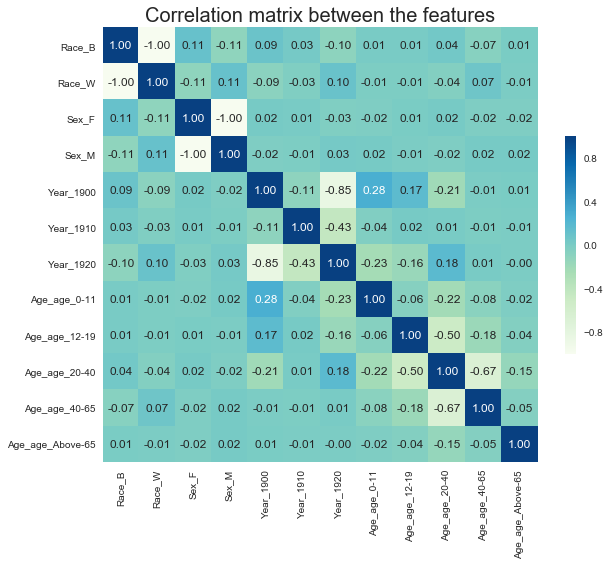

In [60]:
correlation_matrix = train.corr()
plt.figure(figsize=(10,8))
ax = sns.heatmap(correlation_matrix, vmax=1, square=True, annot=True,fmt='.2f', cmap ='GnBu', cbar_kws={"shrink": .5}, robust=True)
plt.title('Correlation matrix between the features', fontsize=20)
plt.show()

## PCA Projection to 2D

In [61]:
data2.columns

Index(['Occ', 'Race_B', 'Race_W', 'Sex_F', 'Sex_M', 'Year_1900', 'Year_1910',
       'Year_1920', 'Age_age_0-11', 'Age_age_12-19', 'Age_age_20-40',
       'Age_age_40-65', 'Age_age_Above-65'],
      dtype='object')

In [62]:
features = ['Race_B', 'Race_W', 'Sex_F', 'Sex_M', 'Year_1900', 'Year_1910',
       'Year_1920', 'Age_age_0-11', 'Age_age_12-19', 'Age_age_20-40',
       'Age_age_40-65', 'Age_age_Above-65']

In [63]:
x = data2.loc[:, features].values

In [64]:
y = data2.loc[:,['Occ']].values

In [65]:
pd.DataFrame(data = x, columns = features).head()

,Race_B,Race_W,Sex_F,Sex_M,Year_1900,Year_1910,Year_1920,Age_age_0-11,Age_age_12-19,Age_age_20-40,Age_age_40-65,Age_age_Above-65
0,1,0,1,0,1,0,0,0,0,1,0,0
1,1,0,0,1,1,0,0,0,0,1,0,0
2,1,0,1,0,1,0,0,0,0,1,0,0
3,1,0,1,0,1,0,0,0,0,1,0,0
4,1,0,1,0,1,0,0,1,0,0,0,0


In [66]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [67]:
principalComponents = pca.fit_transform(x)

In [68]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [69]:
principalDf.head(5)

,principal component 1,principal component 2
0,1.000068,0.319555
1,-0.384219,0.362736
2,1.000068,0.319555
3,1.000068,0.319555
4,0.975304,1.057047


In [70]:
data2[['Occ']].head()

,Occ
0,Unskilled
1,Unskilled
2,Unskilled
3,Unskilled
4,Student


In [71]:
finalDf = pd.concat([principalDf, data2[['Occ']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,Occ
0,1.000068,0.319555,Unskilled
1,-0.384219,0.362736,Unskilled
2,1.000068,0.319555,Unskilled
3,1.000068,0.319555,Unskilled
4,0.975304,1.057047,Student


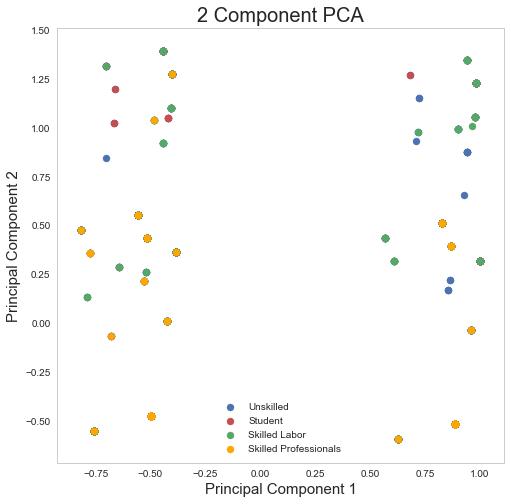

In [72]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['Unskilled', 'Student', 'Skilled Labor','Skilled Professionals']
colors = ['b', 'r','g','orange']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Occ'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [73]:
pca.explained_variance_ratio_

array([0.29820049, 0.2284117 ])

## Receiver Operating Characteristic (ROC)

Example of Receiver Operating Characteristic (ROC) metric to evaluate classifier output quality.

ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.

The “steepness” of ROC curves is also important, since it is ideal to maximize the true positive rate while minimizing the false positive rate.

In [76]:
data2.head()

,Occ,Race_B,Race_W,Sex_F,Sex_M,Year_1900,Year_1910,Year_1920,Age_age_0-11,Age_age_12-19,Age_age_20-40,Age_age_40-65,Age_age_Above-65
0,Unskilled,1,0,1,0,1,0,0,0,0,1,0,0
1,Unskilled,1,0,0,1,1,0,0,0,0,1,0,0
2,Unskilled,1,0,1,0,1,0,0,0,0,1,0,0
3,Unskilled,1,0,1,0,1,0,0,0,0,1,0,0
4,Student,1,0,1,0,1,0,0,1,0,0,0,0


In [77]:
#data2["Occ"]=data2["Occ"].astype(int)
data3 = pd.get_dummies(data2, columns =['Occ'])
data3.columns

Index(['Race_B', 'Race_W', 'Sex_F', 'Sex_M', 'Year_1900', 'Year_1910',
       'Year_1920', 'Age_age_0-11', 'Age_age_12-19', 'Age_age_20-40',
       'Age_age_40-65', 'Age_age_Above-65', 'Occ_Skilled Labor',
       'Occ_Skilled Professionals', 'Occ_Student', 'Occ_Unskilled'],
      dtype='object')

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp


In [79]:
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

In [80]:
X = data3.iloc[:,:-4].values
y = data3.iloc[:,-4:].values

In [81]:
X

array([[1, 0, 1, ..., 1, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [1, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 1, 0, 0]], dtype=uint8)

In [82]:
y

array([[0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]], dtype=uint8)

In [83]:
n_classes = 4

In [84]:
# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]


# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

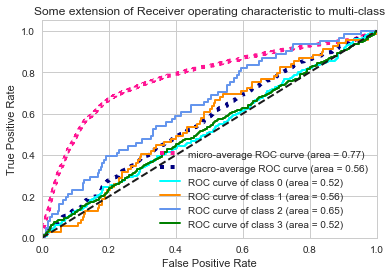

In [85]:
# Compute macro-average ROC curve and ROC area
lw = 2
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()
